In [34]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

import numpy as np

from utils import plot_2d, plot_classifier_boundary

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<h2>MLP vs Logistic Regression</h2>

<h4>mlp being better than lr</h4>

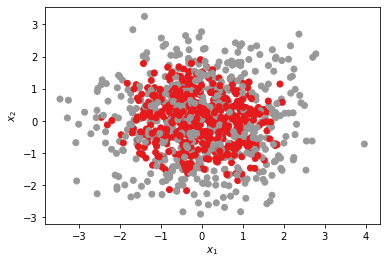

In [35]:
def g_mlp():
    return datasets.make_gaussian_quantiles(
        n_samples=1000,
        n_features=8,
        n_classes=2,
        random_state=42
    )

X, y = g_mlp()
plot_2d(X, y)

In [37]:
mlp = MLPClassifier(
    hidden_layer_sizes=(32, 16, 8),
    activation='relu',
    solver='adam',
    max_iter=3000
)

result_sum = 0
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33)
    
    sc = StandardScaler().fit(X_train)
    sc_X_train = sc.transform(X_train)
    sc_X_test = sc.transform(X_test)
    
    mlp.fit(sc_X_train, y_train)
    result_sum += roc_auc_score(y_test, mlp.predict(sc_X_test))

print('MLP auc: %.3f' % (result_sum / 10))
#plot_classifier_boundary(mlp, X, y, sc)

MLP auc: 0.904


In [38]:
lr = LogisticRegression(max_iter=1000)

result_sum = 0
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33)
    
    lr.fit(X_train, y_train)
    result_sum += roc_auc_score(y_test, lr.predict(X_test))

print('LR auc: %.3f' % (result_sum / 10))

#plot_classifier_boundary(lr, X, y)

LR auc: 0.525


<h4>lr being better than mlp</h4>

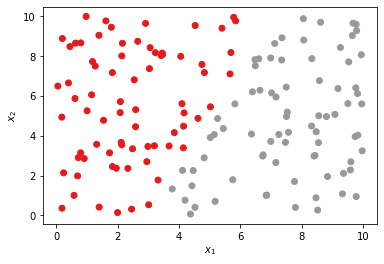

In [11]:
def g_lr():
    def classify(x, y):
        func = 3 * x - 10
        return int(func / y > 1) # 1 or 0 as label

    X = np.random.rand(150, 2) * 10
    y = np.asarray([classify(x, y) for x, y in X])
    return X, y

X, y = g_lr()
plot_2d(X, y)

In [ ]:
mlp = MLPClassifier(
    hidden_layer_sizes=(32, 16, 8),
    activation='relu',
    solver='adam',
    max_iter=3000
)

result_sum = 0
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33)
    
    sc = StandardScaler().fit(X_train)
    sc_X_train = sc.transform(X_train)
    sc_X_test = sc.transform(X_test)
    
    mlp.fit(sc_X_train, y_train)
    result_sum += roc_auc_score(y_test, mlp.predict(sc_X_test))

print('MLP auc: %.3f' % (result_sum / 10))
plot_classifier_boundary(mlp, X, y, sc)

LR auc: 0.985


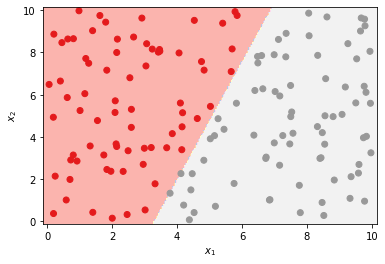

In [13]:
lr = LogisticRegression(max_iter=1000)

result_sum = 0
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33)
    
    lr.fit(X_train, y_train)
    result_sum += roc_auc_score(y_test, lr.predict(X_test))

print('LR auc: %.3f' % (result_sum / 10))

plot_classifier_boundary(lr, X, y)

<h2>MLP vs kNN</h2>

<h4>MLP performing better than kNN</h4>

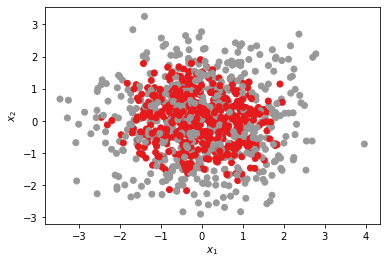

In [30]:
def g_mlp():
    return datasets.make_gaussian_quantiles(
        n_samples=1000,
        n_features=8,
        n_classes=2,
        random_state=42
    )

X, y = g_mlp()
plot_2d(X, y)

In [15]:
mlp = MLPClassifier(
    hidden_layer_sizes=(512, 512, 256, 16),
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)

result_sum = 0
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33)
    
    sc = StandardScaler().fit(X_train)
    sc_X_train = sc.transform(X_train)
    sc_X_test = sc.transform(X_test)
    
    mlp.fit(sc_X_train, y_train)
    result_sum += roc_auc_score(y_test, mlp.predict(sc_X_test))

print('MLP auc: %.3f' % (result_sum / 10))

MLP auc: 0.946


In [31]:
knn = KNeighborsClassifier(n_neighbors=3)

result_sum = 0
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33)
    
    knn.fit(X_train, y_train)
    result_sum += roc_auc_score(y_test, knn.predict(X_test))

print('kNN auc: %.3f' % (result_sum / 10))

kNN auc: 0.681


<h4>kNN performing better than MLP</h4>

The idea behind the following dataset was to create a big amount of randomly placed blobs and labeling them with no specific criteria. The result is a dataset that fits kNN's assumptions on data, that the target value is being able to be determined by looking around the data point's neighbors.

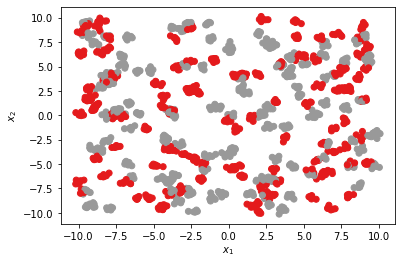

In [17]:
def g_knn():
    X, y = datasets.make_blobs(
        n_samples=1500,
        n_features=2,
        centers=220,
        cluster_std=.16,
        random_state=42
    )
    y = y % 2 # to reduce the amount of different labels to 2
    return X, y
    
X, y = g_knn()
plot_2d(X, y)

MLP auc: 0.549


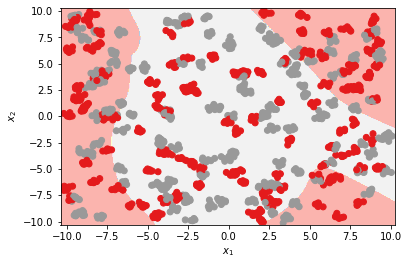

In [18]:
mlp = MLPClassifier(
    hidden_layer_sizes=(512, 512, 256, 16),
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)

result_sum = 0
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33)
    
    sc = StandardScaler().fit(X_train)
    sc_X_train = sc.transform(X_train)
    sc_X_test = sc.transform(X_test)
    
    mlp.fit(sc_X_train, y_train)
    result_sum += roc_auc_score(y_test, mlp.predict(sc_X_test))

print('MLP auc: %.3f' % (result_sum / 10))
plot_classifier_boundary(mlp, X, y, sc)

kNN auc: 0.932


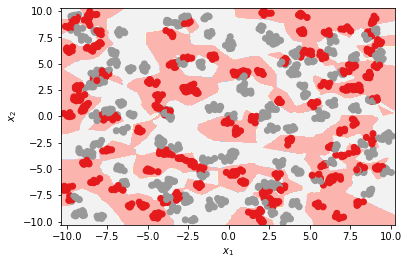

In [28]:
knn = KNeighborsClassifier(n_neighbors=3)

result_sum = 0
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33)
    
    knn.fit(X_train, y_train)
    result_sum += roc_auc_score(y_test, knn.predict(X_test))

print('kNN auc: %.3f' % (result_sum / 10))
plot_classifier_boundary(knn, X, y)